IMPORTING LIBRARIES

In [47]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from math import sqrt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy.lib.shape_base import expand_dims

GETTING DATA FROM EXCEL SHEET

In [67]:
#STORING INFORMATION FROM EXCEL SHEETS
indival = pd.read_excel("ans.xlsx", sheet_name='Individual')
nn = pd.read_excel("codeupdated.xlsx", sheet_name='NN')  

#DECLARE NEURAL NETWORK TO BE MADE HERE
nntobemade = 1
nninfo = nn.iloc[nntobemade-1]

#MAKING DATA AS PER EXCELSHEET
inputs = nninfo["Features"].split(",")               #STORING INPUTS
coli = [indival.columns.get_loc(i) for i in inputs]  #STORING COLUMN NUMBERS OF INPUT
outputs = nninfo["Outcomes"].split(",")              #STORING OUTPUTS
colo = [indival.columns.get_loc(i) for i in outputs] #STORING COLUMN NUMBERS OF OUTPUT
tpnum = [int(i) for i in nninfo["Time"] if i.isnumeric()] #STORING TIME PERIODS
actifun = nninfo["ACTIVATION FUNCTION"] #STROING ACTIVATION FUNCTION
x = [] 
y = []
for i in tpnum:   #TO SELECT DATA FROM EACH TIME PERIOD
    # DEFINING START AND END LIMITS
    start = ((10*i)-10) 
    end = (10*i)
    for j in range(start,end):
      ch = indival.iloc[j].values
      temp = []
      # ADDING THE GIVEN INPUTS TO X LIST
      for k in coli:
        temp.append(ch[k])
      x.append(temp)
      temp = []
      # ADDING THE GIVEN OUTPUTS TO Y LIST
      for l in colo:
        temp.append(ch[l])
      y.append(temp)

#LIST TO NUMPY ARRAY CONVERSION
x = np.array(x) 
y = np.array(y)

DATA SPLITTING, FEATURE SCALING AND NUMPY ARRAY RE-SHAPING

In [68]:
#SPLITTING
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 
#TEST SIZE 20% TRAIN SIZE 80% 
#2:8 IS THE TEST:TRAIN RATIO

#Feature-Scaling
from sklearn.preprocessing import StandardScaler # in neural networks we apply feature scaling on every column 
sc = StandardScaler() #transforming the data to get all values between -3 to +3
#Such that all values are in proportion and bigger values don't dominate
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

#RESHAPING
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) #PRINITING SHAPES OF TRAIN AND TEST DATA

(40, 1, 3) (40, 2) (10, 1, 3) (10, 2)


In [ ]:
print(x_train)

In [ ]:
print(y_train)

MODEL BUILDING

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
#ADDING LSTM LAYER WITH 500 NEURONS IN THE HIDDEN LAYERS
model.add(LSTM(500, activation=actifun.lower(),input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(Dense(len(outputs))) #OUTPUT LAYER
model.compile(loss='mae', optimizer='adam') #LOSS FUNCTION IS MEAN ABSOLUTE ERROR AS WE ARE USING NUMERIC VALUES

MODEL FITTING

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)

PLOTTING LOSS DATA

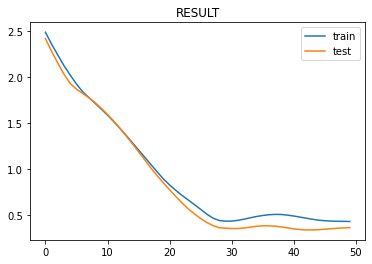

In [72]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("RESULT")
pyplot.legend()
pyplot.show()

#PLOTTING LOSS DATA OF THE TRAINING AND TESTING SETS

PREDICITON

In [74]:
ypred = model.predict(x_test)
print(ypred)

[[4.0640945  0.21918872]
 [3.964504   0.2859648 ]
 [4.175365   0.1879513 ]
 [4.1550455  0.13632448]
 [4.0787444  0.2008081 ]
 [4.0687056  0.25615436]
 [4.0662947  0.22805594]
 [4.0011063  0.27821106]
 [4.036335   0.2491138 ]
 [4.1022224  0.1850628 ]]


RMSE VALUE


In [75]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test, ypred))
print('RMSE: %.3f' % rmse)

RMSE: 0.452
